In [2]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import pprint, pickle

In [32]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [34]:
cap = cv2.VideoCapture("/home/jayasanka/Documents/gait recognition/Data set/side-right/test.webm")

#check the fps
#fps = cap.get(cv2.CAP_PROP_FPS) 
#print(fps)

myarray = np.empty(shape=(1,33,4))

start = time.time()

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    idx=0
    while cap.isOpened():
        
        ret, frame = cap.read()
        if ret:

            #set specific frames sequence by vedio
            #cap.set(cv2.CAP_PROP_POS_FRAMES, idx* 4)

            # Recolor Feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Make Detections
            results = holistic.process(image)
            # print(results.face_landmarks)

            # Recolor image back to BGR for rendering
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
            #print(results.pose_landmarks)
            #print("--------------------------------------")

            if results.pose_landmarks != None:
                key_list= []
                t=time.time()
                for data_point in results.pose_landmarks.landmark:
                    key_list.append([data_point.x,data_point.y,data_point.z,t])    
                mat = np.array(key_list)
                myarray = np.vstack([myarray,[mat]])

            idxx=time.time()
            #idx+=1
            #path="/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/frames3"
            #cv2.imwrite(os.path.join(path , '{}.png'.format(idxx)),image)

            cv2.imshow('Raw Webcam Feed', image)
            #................................................................

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                #idx=0
        else:
            break
            
            
end = time.time()
print(end - start)
cap.release()
cv2.destroyAllWindows()



566.3405051231384


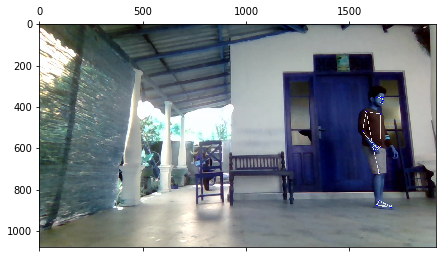

In [35]:
plt.matshow(image)

In [36]:
#np.set_printoptions(threshold=np.inf)
#print(myarray)

In [37]:
key_array = np.delete(myarray, 0, 0)
np.set_printoptions(threshold=np.inf)
print(key_array.shape)
print(len(key_array))

(7155, 33, 4)
7155


In [38]:
output = open('key_data/key_array_test_side.pkl', 'wb')
pickle.dump(key_array, output)
output.close()

In [310]:


f_file = open('key_data/key_array_isurika_side.pkl', 'rb')

key_array = pickle.load(f_file)
#pprint.pprint(fT)

f_file.close()


# definitions

In [311]:
def get_peaks(df,y):
    peaks, _ = find_peaks(-y,prominence=0.03)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks

In [312]:
def time_diff(peaks):
    array=[]
    for i in range(len(peaks)-1):
        td=df.t[peaks[i+1]]-df.t[peaks[i]]
        array.append(td)
    return array

In [313]:
def distribution(data):
    ax=sns.distplot(data,
                kde=True,
                bins=8,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.60})
    ax.set(xlabel='Binomial',ylabel='Frequency')
    plt.show()

In [314]:
def remove_time_gap(data):
    from statistics import stdev,mean
    SD=stdev(data)
    m= mean(data)
 
    cut_off = SD * 0.5
    upper =  m + cut_off
    array = [x for x in data if x < upper]
    return array
    

In [315]:
def remove_distinc(array,df,Time_to_index_ratio,y):
    modified_mean= mean(array)
    Distance=Time_to_index_ratio*modified_mean*0.5
    
    peaks, _ = find_peaks(-y,prominence=0.03,distance=Distance)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks
    

In [316]:
def sample(df,strike_peak,time_return_points):
    a = np.array(df.t[strike_peak])
    sample_strikes=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : df.t[strike_peak[a]], index[0]))
        sample_strikes.append(s)
    return sample_strikes

In [317]:
def strides(sample_strikes):
    strides=[]
    for strike in sample_strikes:
        sample=[]
        for i in range(len(strike)-1):
            t_diff=strike[i+1]-strike[i]
            sample.append(t_diff)
        strides.append(sample)
    return strides
    

In [318]:
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C

# anckle-hip length side

In [319]:
array=[]
for i in range(len(key_array)):
    t=key_array[i][28][3]
    right=abs(key_array[i][24][1]-key_array[i][28][1])
    left=abs(key_array[i][23][1]-key_array[i][27][1])
    heel_r=abs(key_array[i][24][1]-key_array[i][30][1])
    foot_index_r=abs(key_array[i][24][1]-key_array[i][32][1])
    heel_l=abs(key_array[i][23][1]-key_array[i][29][1])
    foot_index_l=abs(key_array[i][23][1]-key_array[i][31][1])
    x=key_array[i][28][0]
    center=(key_array[i][11][0]+key_array[i][12][0]+key_array[i][23][0]+key_array[i][24][0])/4
    array.append([right])
    array[i].append(left)
    array[i].append(heel_r)
    array[i].append(foot_index_r)
    array[i].append(heel_l)
    array[i].append(foot_index_l)
    array[i].append(t)
    array[i].append(x)
    array[i].append(center)
array = np.array(array)
print(array)

[[1.70416832e-02 1.77556276e-03 1.80360675e-02 ... 1.64622843e+09
  4.31474835e-01 4.47371200e-01]
 [2.92036533e-02 2.77914405e-02 3.24267745e-02 ... 1.64622844e+09
  4.37578946e-01 4.42662098e-01]
 [3.67169380e-02 3.39782238e-02 3.98328304e-02 ... 1.64622844e+09
  4.37552929e-01 4.42562655e-01]
 ...
 [2.25829184e-01 2.23111868e-01 2.49941587e-01 ... 1.64623090e+09
  3.11524749e-01 2.99335316e-01]
 [2.33486235e-01 2.33091295e-01 2.58561194e-01 ... 1.64623090e+09
  3.29529107e-01 3.01869392e-01]
 [2.34393716e-01 2.37170219e-01 2.59200633e-01 ... 1.64623090e+09
  3.43535125e-01 3.00432198e-01]]


In [320]:
df = pd.DataFrame(array,columns=['r','l','h_R','f_R','h_L','f_L','t','x','center'])
print(df)

              r         l       h_R       f_R       h_L       f_L  \
0      0.017042  0.001776  0.018036  0.024187  0.000724  0.004714   
1      0.029204  0.027791  0.032427  0.031321  0.030939  0.028063   
2      0.036717  0.033978  0.039833  0.042322  0.038227  0.037271   
3      0.013557  0.006497  0.017153  0.015636  0.010551  0.002345   
4      0.031699  0.029837  0.030807  0.039433  0.028723  0.037990   
...         ...       ...       ...       ...       ...       ...   
28749  0.215005  0.217828  0.224002  0.272716  0.240878  0.256937   
28750  0.222855  0.206782  0.243596  0.272583  0.224046  0.234467   
28751  0.225829  0.223112  0.249942  0.267004  0.246629  0.241501   
28752  0.233486  0.233091  0.258561  0.264709  0.255777  0.245826   
28753  0.234394  0.237170  0.259201  0.252820  0.260489  0.258918   

                  t         x    center  
0      1.646228e+09  0.431475  0.447371  
1      1.646228e+09  0.437579  0.442662  
2      1.646228e+09  0.437553  0.442563  
3  

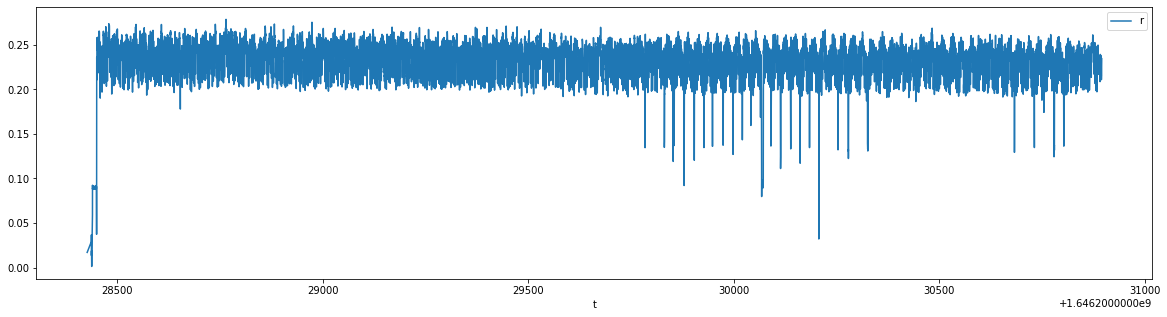

In [321]:
df.plot(x ='t', y='r', kind = 'line',figsize=(20,5))
plt.show()

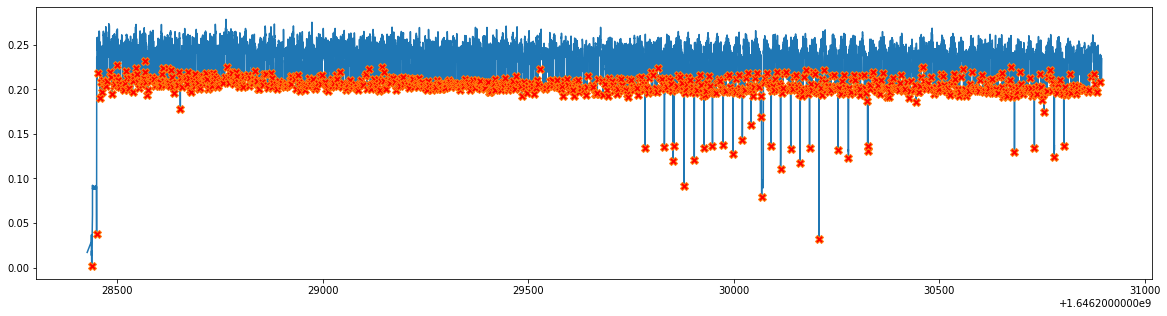

In [322]:
peaks=get_peaks(df,df.r)

In [323]:

Time_to_index_ratio=(peaks[1]-peaks[0])/(df.t[peaks[1]]-df.t[peaks[0]])
print(Time_to_index_ratio)

9.850907529310266


# walking direction

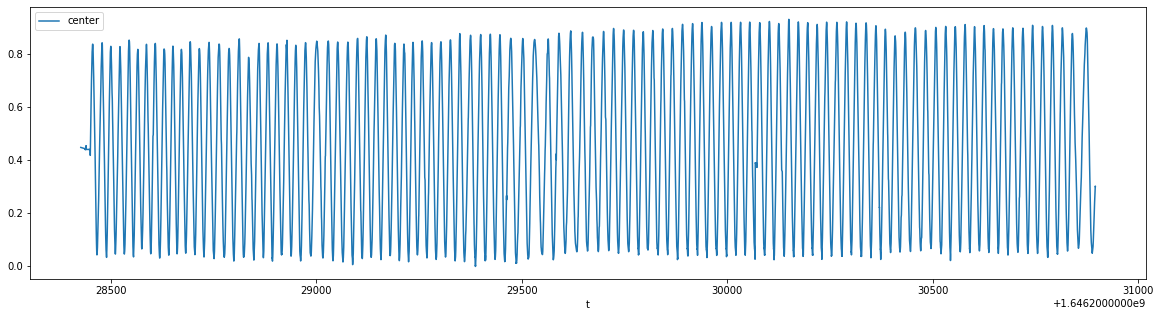

In [324]:
df.plot(x ='t', y='center', kind = 'line',figsize=(20,5))
plt.show()

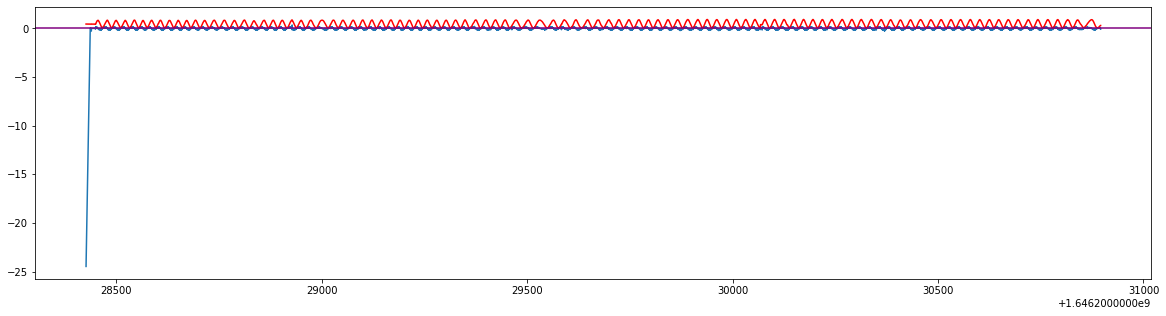

In [325]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.center, k=4, s=0)
diffspl = spl.derivative()

plt.figure(figsize=(20,5))
plt.plot(df.t,diffspl(df.t))
plt.plot(df.t,df.center,'r')
plt.axhline(y=0, color='purple', linestyle='-')
plt.show()



[199, 327, 478, 605, 728, 852, 973, 1099, 1244, 1379, 1510, 1633, 1774, 1898, 2030, 2165, 2300, 2437, 2563, 2689, 2820, 2954, 3091, 3235, 3369, 3512, 3664, 3814, 3961, 4105, 4246, 4388, 4543, 4672, 4823, 4970, 5121, 5253, 5393, 5525, 5662, 5798, 5960, 6083, 6227, 6372, 6519, 6659, 6802, 6949, 7094, 7232, 7373, 7519, 7661, 7807, 7954, 8088, 8228, 8359, 8499, 8642, 8784, 8916, 9055, 9185, 9321, 9457, 9593, 9731, 9876, 10019, 10159, 10304, 10448, 10592, 10743, 10889, 11037, 11178, 11331, 11483, 11636, 11778, 11932, 12079, 12230, 12379, 12533, 12679, 12822, 12966, 13112, 13255, 13394, 13538, 13687, 13839, 13989, 14138, 14283, 14429, 14567, 14705, 14848, 14993, 15134, 15280, 15422, 15571, 15713, 15859, 16000, 16140, 16286, 16436, 16570, 16716, 16845, 16995, 17133, 17289, 17421, 17568, 17695, 17846, 17969, 18118, 18263, 18411, 18543, 18684, 18826, 18967, 19090, 19228, 19364, 19505, 19648, 19786, 19919, 20068, 20201, 20344, 20480, 20622, 20754, 20898, 21029, 21171, 21296, 21438, 21581, 21724,

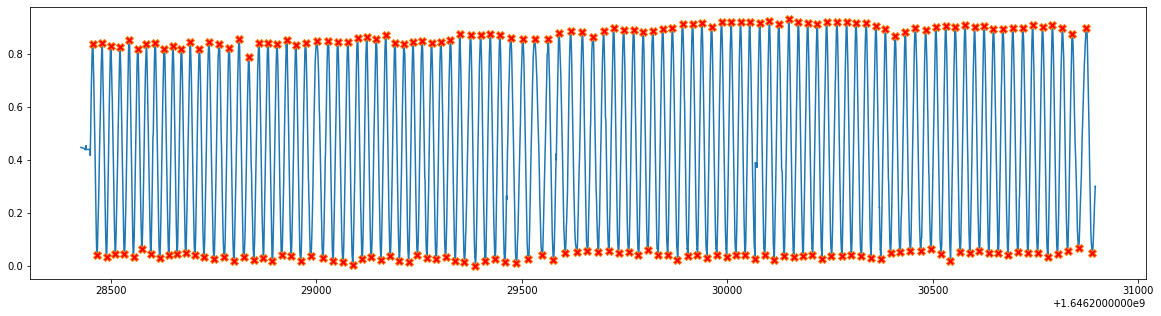

In [326]:
return_points_plus , _ = find_peaks(df.center,prominence=0.05)
return_points_minus , _ = find_peaks(-df.center,prominence=0.05)
if return_points_plus[0]<return_points_minus[0]:
    return_points=com(return_points_plus,return_points_minus)
else:
    return_points=com(return_points_minus,return_points_plus)
print(return_points)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(20,5))
plt.plot(df.t,df.center)
plt.plot(df.t[return_points], df.center[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [327]:
a = diffspl(df.t)
zero_crossings = np.where(np.diff(np.sign(a)))[0]
print(zero_crossings)

[    0     1     6     8     9    11    14    15    17    18    19    21
    22    24    26    27    29    32    34    35    36    37    38    40
    41    44    46    47    51    53    54    55    59    60    64    66
    75    83    85    87    89    90    98    99   100   104   109   110
   117   118   121   125   126   127   129   198   327   328   329   477
   605   728   851   878   879   973  1098  1244  1246  1247  1370  1371
  1378  1500  1501  1509  1511  1512  1633  1634  1635  1773  1837  1838
  1898  2029  2165  2300  2305  2306  2374  2375  2437  2438  2440  2563
  2686  2687  2689  2691  2692  2820  2954  3090  3235  3236  3237  3368
  3374  3375  3512  3661  3662  3664  3813  3956  3957  3961  3962  3963
  4100  4103  4105  4108  4109  4115  4116  4246  4256  4257  4379  4380
  4385  4386  4388  4389  4390  4420  4421  4542  4671  4674  4676  4677
  4681  4684  4685  4686  4687  4823  4897  4898  4963  4964  4970  5121
  5122  5125  5253  5393  5394  5395  5494  5495  5

In [328]:
if df.center[zero_crossings[0]]>df.center[zero_crossings[1]]:
    plus=1
    minus=0
elif df.center[zero_crossings[0]]<df.center[zero_crossings[1]]:
    plus=0
    minus=1
else:
    print("error in direction detection")

In [329]:
print(plus,minus)

1 0


In [330]:
plus=1
minus=0

In [331]:
df['velocity'] = diffspl(df.t)
print(df)

              r         l       h_R       f_R       h_L       f_L  \
0      0.017042  0.001776  0.018036  0.024187  0.000724  0.004714   
1      0.029204  0.027791  0.032427  0.031321  0.030939  0.028063   
2      0.036717  0.033978  0.039833  0.042322  0.038227  0.037271   
3      0.013557  0.006497  0.017153  0.015636  0.010551  0.002345   
4      0.031699  0.029837  0.030807  0.039433  0.028723  0.037990   
...         ...       ...       ...       ...       ...       ...   
28749  0.215005  0.217828  0.224002  0.272716  0.240878  0.256937   
28750  0.222855  0.206782  0.243596  0.272583  0.224046  0.234467   
28751  0.225829  0.223112  0.249942  0.267004  0.246629  0.241501   
28752  0.233486  0.233091  0.258561  0.264709  0.255777  0.245826   
28753  0.234394  0.237170  0.259201  0.252820  0.260489  0.258918   

                  t         x    center   velocity  
0      1.646228e+09  0.431475  0.447371 -24.478969  
1      1.646228e+09  0.437579  0.442662   0.010124  
2      1.646

In [332]:
df_plus=df[df.velocity > 0] 
df_minus=df[df.velocity < 0]
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

       index         r         l       h_R       f_R       h_L       f_L  \
0          1  0.029204  0.027791  0.032427  0.031321  0.030939  0.028063   
1          7  0.017191  0.018477  0.018543  0.013194  0.020050  0.019237   
2          8  0.010518  0.009169  0.010438  0.008850  0.011669  0.006206   
3         10  0.004053  0.004163  0.004718  0.002899  0.000034  0.007055   
4         11  0.001286  0.000416  0.001888  0.000436  0.002950  0.002617   
...      ...       ...       ...       ...       ...       ...       ...   
14155  28748  0.214744  0.226483  0.223108  0.267000  0.248058  0.258716   
14156  28749  0.215005  0.217828  0.224002  0.272716  0.240878  0.256937   
14157  28750  0.222855  0.206782  0.243596  0.272583  0.224046  0.234467   
14158  28751  0.225829  0.223112  0.249942  0.267004  0.246629  0.241501   
14159  28752  0.233486  0.233091  0.258561  0.264709  0.255777  0.245826   

                  t         x    center  velocity  
0      1.646228e+09  0.437579  0.44

# Right leg

# walking left to right-plus direction

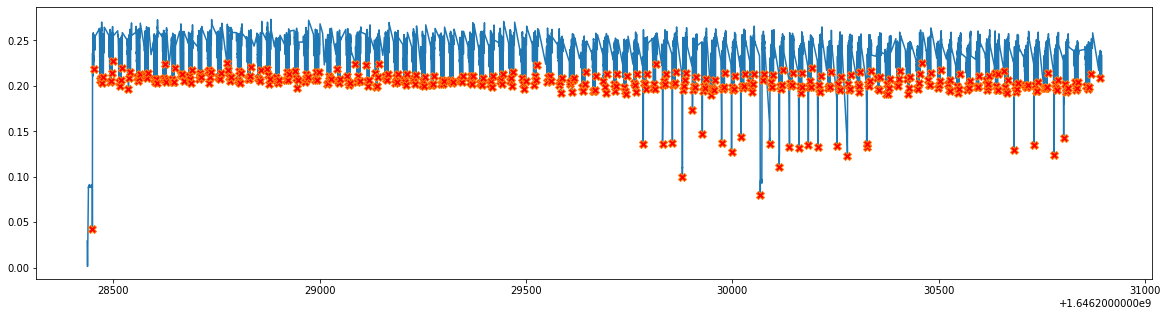

In [333]:
peaks=get_peaks(df_plus,df_plus.r)

[3.3629508018493652, 5.042601585388184, 2.646104574203491, 2.676064968109131, 2.3478519916534424, 4.582225561141968, 2.5112199783325195, 2.1711227893829346, 2.7366459369659424, 2.887585401535034, 2.4032084941864014, 2.106926441192627, 2.7732017040252686, 5.3162407875061035, 2.4886646270751953, 2.2980551719665527, 5.036237716674805, 2.461878538131714, 2.51825213432312, 2.82045841217041, 3.663217306137085, 2.267591714859009, 2.5663206577301025, 3.049638271331787, 5.211634397506714, 2.390406608581543, 2.257462739944458, 2.492797613143921, 4.366078853607178, 2.301697015762329, 0.9585714340209961, 1.281137466430664, 2.4893014430999756, 3.8490114212036133, 2.3966355323791504, 2.2343173027038574, 2.602299928665161, 2.4438936710357666, 2.301285743713379, 2.2446162700653076, 2.638545036315918, 2.4603607654571533, 2.298499822616577, 2.236907720565796, 2.300496816635132, 4.886588096618652, 2.271693706512451, 2.2709012031555176, 2.5569303035736084, 3.4302167892456055, 2.394946336746216, 1.03886365

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


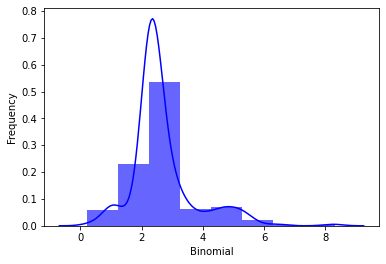

In [334]:
dt_plus_right=time_diff(peaks)
print(dt_plus_right)
distribution(dt_plus_right)

[2.646104574203491, 2.676064968109131, 2.3478519916534424, 2.5112199783325195, 2.1711227893829346, 2.7366459369659424, 2.887585401535034, 2.4032084941864014, 2.106926441192627, 2.7732017040252686, 2.4886646270751953, 2.2980551719665527, 2.461878538131714, 2.51825213432312, 2.82045841217041, 2.267591714859009, 2.5663206577301025, 3.049638271331787, 2.390406608581543, 2.257462739944458, 2.492797613143921, 2.301697015762329, 0.9585714340209961, 1.281137466430664, 2.4893014430999756, 2.3966355323791504, 2.2343173027038574, 2.602299928665161, 2.4438936710357666, 2.301285743713379, 2.2446162700653076, 2.638545036315918, 2.4603607654571533, 2.298499822616577, 2.236907720565796, 2.300496816635132, 2.271693706512451, 2.2709012031555176, 2.5569303035736084, 2.394946336746216, 1.0388636589050293, 1.2869441509246826, 2.6752254962921143, 2.3988444805145264, 2.2187447547912598, 2.985766649246216, 2.3725414276123047, 2.8088324069976807, 2.2560999393463135, 2.3058457374572754, 2.406888246536255, 2.324

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


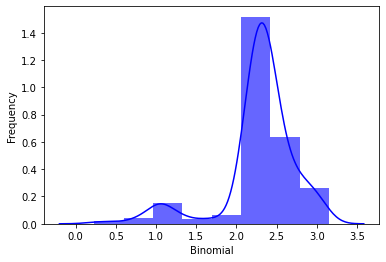

In [335]:
dt_plus_right_new=remove_time_gap(dt_plus_right)
print(dt_plus_right_new)
distribution(dt_plus_right_new)

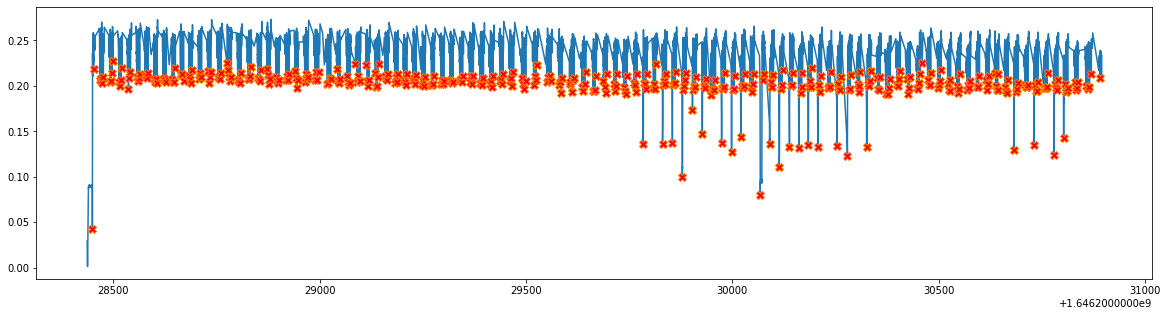

In [336]:
plus_peaks_R=remove_distinc(dt_plus_right,df_plus,Time_to_index_ratio,df_plus.r)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


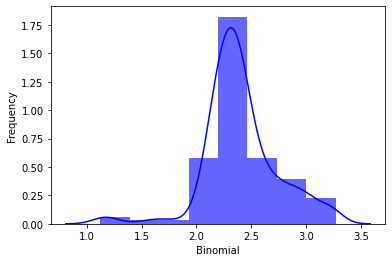

In [337]:
dt_plus_right=time_diff(plus_peaks_R)
dt_plus_right_cleaned=remove_time_gap(dt_plus_right)
distribution(dt_plus_right_cleaned)

# Walking right to Left - minus direction

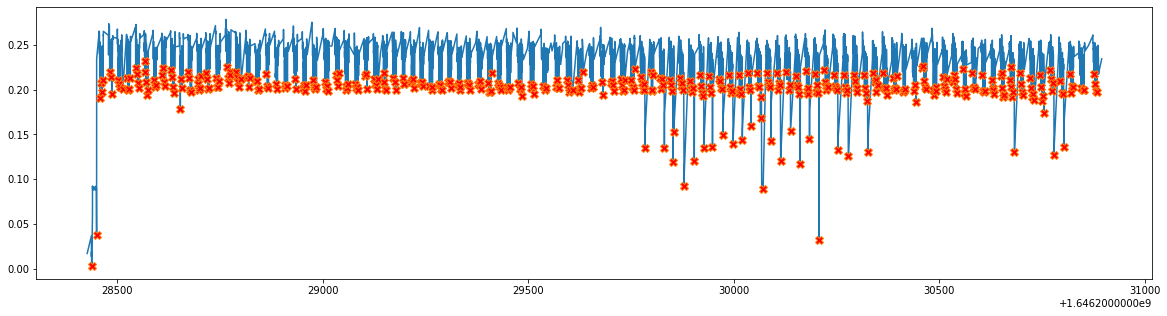

In [338]:
peaks=get_peaks(df_minus,df_minus.r)

[7.913919448852539, 2.8960444927215576, 2.4092323780059814, 2.1499905586242676, 2.680022716522217, 3.719123125076294, 2.2646234035491943, 2.0765881538391113, 5.378616571426392, 2.3033711910247803, 2.467952251434326, 3.2812445163726807, 2.2317709922790527, 2.435945987701416, 2.5804738998413086, 2.31382417678833, 1.4735898971557617, 4.070934534072876, 0.9041759967803955, 2.3791327476501465, 5.078949451446533, 1.4161112308502197, 1.2689566612243652, 2.8378403186798096, 2.4953949451446533, 4.257505416870117, 2.947925567626953, 2.422959089279175, 4.416878938674927, 2.3889379501342773, 2.526146650314331, 2.7135190963745117, 4.019207000732422, 2.32901930809021, 2.325798273086548, 2.3961563110351562, 4.979393005371094, 2.222393274307251, 2.128631353378296, 4.985105514526367, 2.407402515411377, 2.321666955947876, 2.528061628341675, 4.140299558639526, 2.142998695373535, 2.2068932056427, 2.440992593765259, 0.9444522857666016, 2.92810320854187, 2.4212374687194824, 2.239733934402466, 2.471435785293

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


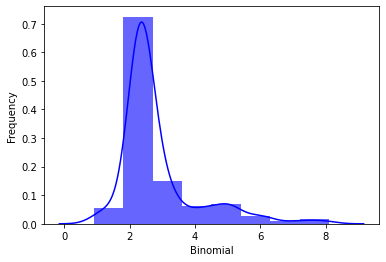

In [339]:
dt_minus_right=time_diff(peaks)
print(dt_minus_right)
distribution(dt_minus_right)

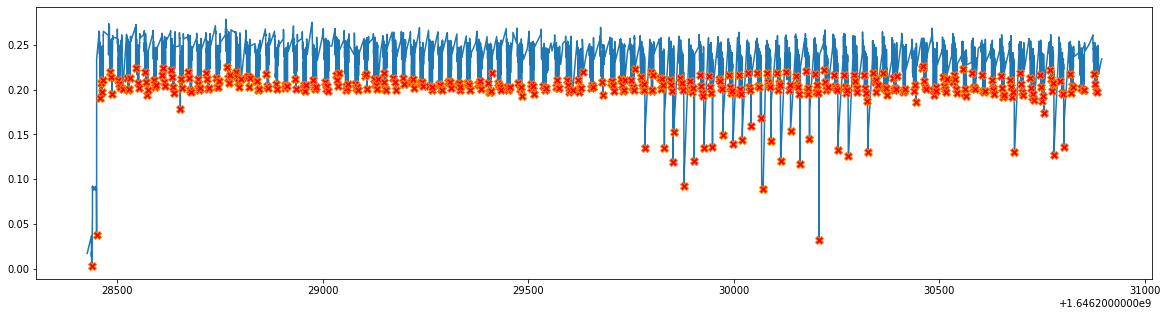

In [340]:
minus_peaks_R=remove_distinc(dt_minus_right,df_minus,Time_to_index_ratio,df_minus.r)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


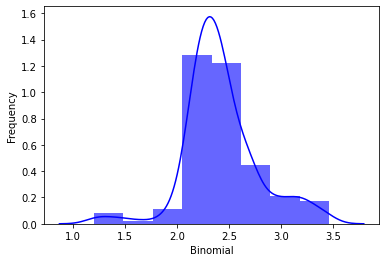

In [341]:
dt_minus_right=time_diff(minus_peaks_R)
dt_minus_right_cleaned=remove_time_gap(dt_minus_right)
distribution(dt_minus_right_cleaned)

# sampling- right leg

In [342]:
sample_strikes_plus_R=sample(df_plus,plus_peaks_R,time_return_points)
sample_strikes_minus_R=sample(df_minus,minus_peaks_R,time_return_points)

In [343]:
strides_plus_R=strides(sample_strikes_plus_R)
strides_minus_R=strides(sample_strikes_minus_R)
print(strides_plus_R)
print('\n')
print(strides_minus_R)

[[], [2.7366459369659424, 2.6421597003936768, 2.49372935295105], [], [2.4690794944763184, 2.318955421447754, 2.929363250732422], [], [2.8254661560058594, 2.333367109298706, 2.8131020069122314], [], [2.404803991317749, 2.2352705001831055], [], [2.415158748626709, 2.1401419639587402, 2.284170389175415], [], [2.2659196853637695, 2.24646258354187, 2.3951995372772217], [], [2.3883309364318848, 2.7198731899261475, 2.3065567016601562], [], [2.3320791721343994, 2.2377161979675293, 2.484528064727783], [], [2.3911399841308594, 2.2236156463623047, 2.75412917137146], [], [2.297393321990967, 2.2333426475524902, 2.627187490463257], [], [2.327528238296509, 2.237421751022339, 2.295593738555908], [], [2.321415662765503, 2.2367963790893555, 2.5330777168273926], [], [2.4377658367156982, 2.337451696395874, 2.416637420654297], [], [2.6412360668182373, 2.268800973892212, 2.5064890384674072], [], [2.4254727363586426, 2.3784801959991455, 2.524219036102295], [], [2.626077175140381, 2.8254964351654053, 2.417804

In [344]:
avg_stride_plus_R=list(map(lambda a : np.mean(a), strides_plus_R[plus::2]))
avg_stride_minus_R=list(map(lambda a : np.mean(a), strides_minus_R[minus::2]))
print(avg_stride_plus_R)
print('\n')
print(avg_stride_minus_R)

[2.624178330103556, 2.5724660555521646, 2.657311757405599, 2.3200372457504272, 2.2798237005869546, 2.3025272687276206, 2.4715869426727295, 2.3514411449432373, 2.4562949339548745, 2.3859744866689048, 2.2868479092915854, 2.3637632528940835, 2.397284984588623, 2.472175359725952, 2.4427239894866943, 2.6231260299682617, 2.4313037395477295, 2.437852462132772, 2.3740386168162027, 2.568892319997152, 2.3851143519083657, 2.3992958863576255, 2.363109827041626, 2.754505713780721, 2.624552567799886, 2.3334616820017495, 2.4196553230285645, 2.345598300298055, 2.2788310845692954, 2.549161970615387, 2.3563989798227944, 2.3465003172556558, 2.3963894844055176, 2.2306249936421714, 2.253599007924398, 2.2811691761016846, 2.3392370541890464, 2.2842411200205484, 2.24241574605306, 2.95613423983256, 2.5161035855611167, 2.3049778938293457, 2.2513222694396973, 2.9988386631011963, 3.1361657778422036, 3.0039846102396646, 3.0903298060099282, 2.501643975575765, 2.6078465580940247, 2.777270476023356, 2.766801834106445

# Left leg

# walking left to right-plus direction

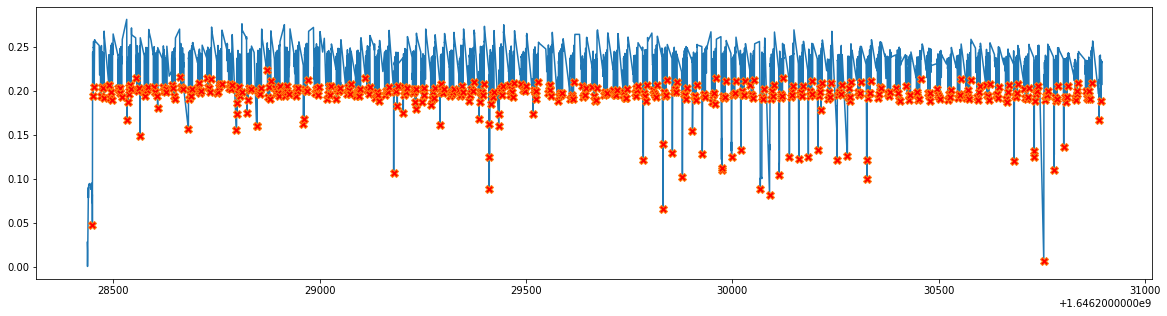

In [345]:
peaks=get_peaks(df_plus,df_plus.l)

[2.1640779972076416, 2.6394941806793213, 5.03090500831604, 2.7310287952423096, 2.3540897369384766, 2.4283645153045654, 1.2391471862792969, 1.0540978908538818, 2.5043039321899414, 2.0671842098236084, 2.312929391860962, 3.1578893661499023, 2.6479809284210205, 1.1217186450958252, 0.9454696178436279, 2.319716691970825, 3.0697085857391357, 2.799959421157837, 2.1256282329559326, 1.1738557815551758, 1.1458637714385986, 2.647031784057617, 2.4604668617248535, 2.5158169269561768, 2.7063791751861572, 2.1836979389190674, 3.344322919845581, 0.8212192058563232, 2.3436522483825684, 2.4796550273895264, 2.618767738342285, 3.2039794921875, 2.3905062675476074, 2.55169677734375, 2.0986971855163574, 2.458798885345459, 2.486501932144165, 1.7455940246582031, 2.4606523513793945, 2.574331283569336, 2.1539740562438965, 1.6864588260650635, 2.2431187629699707, 2.5579991340637207, 2.002358913421631, 2.3064308166503906, 2.684267282485962, 2.5164241790771484, 2.238478422164917, 2.388458251953125, 2.487738609313965, 

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


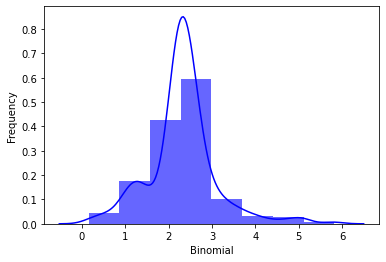

In [346]:
dt_plus_left=time_diff(peaks)
print(dt_plus_left)
distribution(dt_plus_left)

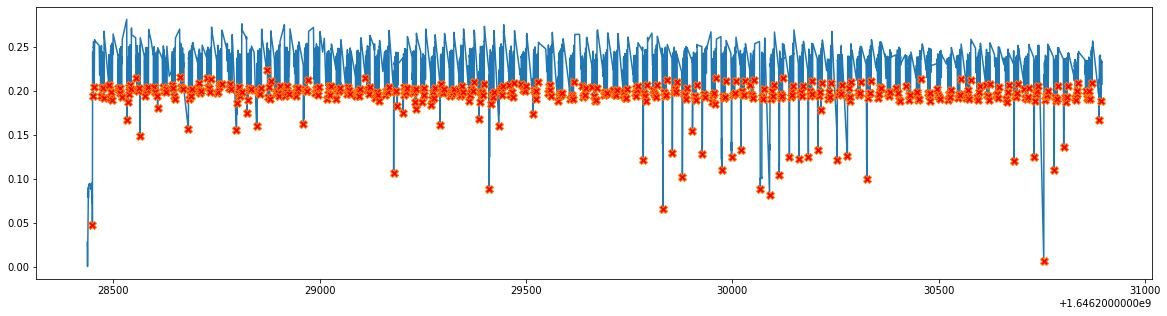

In [347]:
plus_peaks_L=remove_distinc(dt_plus_left,df_plus,Time_to_index_ratio,df_plus.l)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


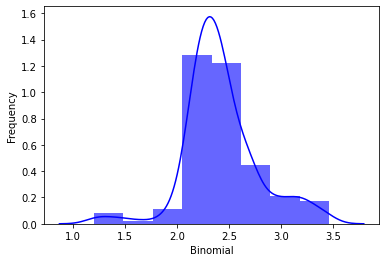

In [348]:
dt_minus_right=time_diff(minus_peaks_R)
dt_minus_right_cleaned=remove_time_gap(dt_minus_right)
distribution(dt_minus_right_cleaned)

# Walking right to Left - minus direction

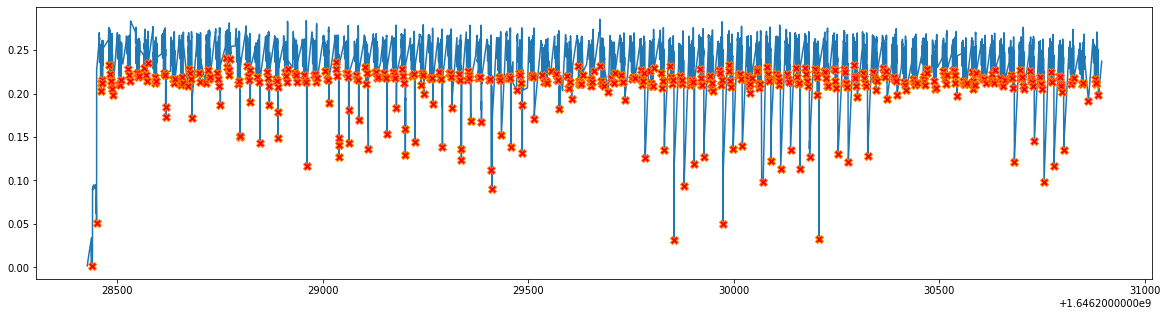

In [349]:
peaks=get_peaks(df_minus,df_minus.l)

[7.988362073898315, 3.905137538909912, 1.3239619731903076, 1.1257545948028564, 2.4090018272399902, 3.753105401992798, 2.3642287254333496, 1.0871086120605469, 1.0540978908538818, 2.5947084426879883, 1.4365785121917725, 4.743679523468018, 1.2673404216766357, 2.7355401515960693, 5.126447439193726, 2.771162509918213, 2.3507158756256104, 6.429922342300415, 2.3090806007385254, 2.5794334411621094, 1.9446697235107422, 5.887678623199463, 2.6166646480560303, 2.683479070663452, 5.729596138000488, 1.091214895248413, 2.8097918033599854, 6.661372184753418, 2.4601712226867676, 3.1960551738739014, 0.9276115894317627, 5.041852235794067, 2.177292823791504, 3.838484764099121, 3.352726697921753, 1.11439847946167, 1.2677996158599854, 2.278670072555542, 2.0562422275543213, 2.8788743019104004, 2.305752992630005, 2.399888038635254, 2.7659759521484375, 3.5990452766418457, 2.367621898651123, 2.191978931427002, 3.6934125423431396, 5.068414688110352, 2.3965766429901123, 3.8406929969787598, 3.6406733989715576, 2.7

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


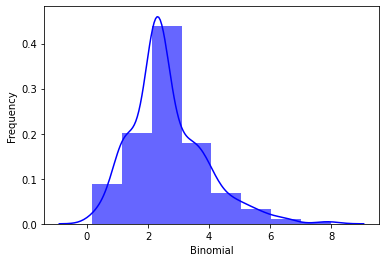

In [350]:

dt_minus_left=time_diff(peaks)
print(dt_minus_left)
distribution(dt_minus_left)

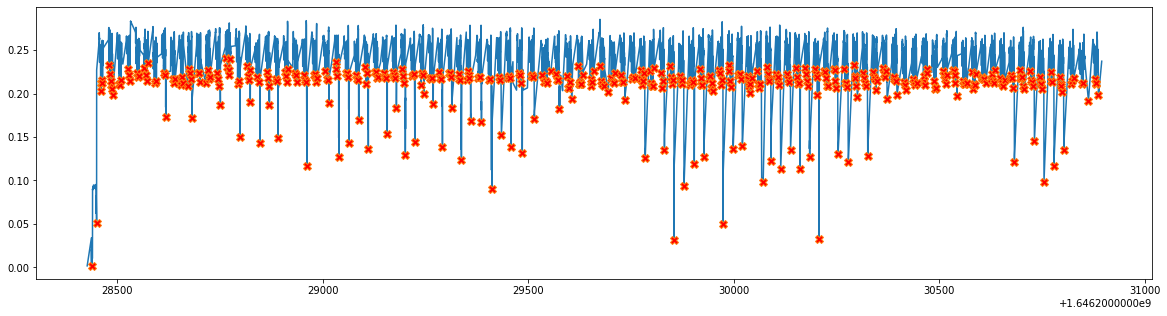

In [351]:
minus_peaks_L=remove_distinc(dt_minus_left,df_minus,Time_to_index_ratio,df_minus.l)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


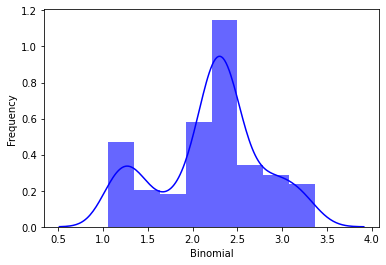

In [352]:
dt_minus_left=time_diff(minus_peaks_L)
dt_minus_left_cleaned=remove_time_gap(dt_minus_left)
distribution(dt_minus_left_cleaned)

# sampling-left leg

In [353]:
sample_strikes_plus_L=sample(df_plus,plus_peaks_L,time_return_points)
sample_strikes_minus_L=sample(df_minus,minus_peaks_L,time_return_points)

In [354]:
strides_plus_L=strides(sample_strikes_plus_L)
strides_minus_L=strides(sample_strikes_minus_L)
print(strides_plus_L)
print('\n')
print(strides_minus_L)

[[], [2.6181540489196777, 2.615691661834717, 2.4085261821746826], [], [1.1509833335876465, 2.5579285621643066, 2.056530714035034, 2.500920295715332], [], [2.9225573539733887, 1.3861932754516602, 1.022284984588623, 2.6864089965820312], [], [2.495591402053833, 2.07616925239563, 1.1243641376495361, 1.1308386325836182, 2.551561117172241], [], [2.3960227966308594, 2.3990349769592285, 2.0584781169891357, 2.612114429473877], [], [2.344144821166992, 2.151242256164551, 2.632908582687378], [], [2.5613529682159424, 2.057577610015869, 2.8298258781433105, 2.452186107635498], [], [2.494734287261963, 2.547797203063965, 2.1552159786224365, 1.6929585933685303], [], [2.5456743240356445, 1.984623908996582, 2.4367520809173584], [], [2.5414888858795166, 2.2363033294677734, 2.3796842098236084], [], [2.5684266090393066, 2.0677242279052734, 2.3926193714141846, 2.313810348510742], [], [2.5539193153381348, 0.962390661239624, 1.1872522830963135, 2.317803144454956], [], [2.80877423286438, 2.3368961811065674, 2.27

In [355]:
avg_stride_plus_L=list(map(lambda a : np.mean(a), strides_plus_L[plus::2]))
avg_stride_minus_L=list(map(lambda a : np.mean(a), strides_minus_L[minus::2]))
print(avg_stride_plus_L)
print('\n')
print(avg_stride_minus_L)

[2.547457297643026, 2.06659072637558, 2.004361152648926, 1.8757049083709716, 2.366412580013275, 2.37609855333964, 2.475235641002655, 2.2226765155792236, 2.322350104649862, 2.3858254750569663, 2.3356451392173767, 1.755341351032257, 2.4795714020729065, 2.593698740005493, 2.4125880002975464, 2.6592936515808105, 2.3987154364585876, 2.5983415842056274, 2.439544975757599, 2.43698251247406, 2.3382205963134766, 2.2988789081573486, 2.3648434480031333, 2.9513418674468994, 2.6012837886810303, 2.3406724333763123, 2.4083975156148276, 2.404387056827545, 2.2035972277323403, 2.5760533213615417, 2.417889416217804, 2.9600788752237954, 1.8855257987976075, 1.779512071609497, 2.1710808277130127, 2.378527879714966, 2.0162352085113526, 2.423526406288147, 2.2516067028045654, 3.0175357460975647, 2.0808297634124755, 2.6607236862182617, 2.6526790857315063, 3.0083587765693665, 3.237989604473114, 2.440140151977539, 2.2085280418395996, 2.7532679438591003, 2.940316319465637, 2.775774896144867, 2.753132939338684, 2.4

# define feature vector array

In [356]:
TP_side=[]

In [357]:
T_s=[[[None],[None]],[[None],[None]],[[None],[None]],[[None],[None]],[None],[None],[None],[None]]

# stride time 

In [358]:
def comb_dir_arrays(plus_array,minus_array,plus,minus):   
    if plus<minus:
        array=com(plus_array,minus_array)
    elif plus>minus:
        array=com(minus_array,plus_array)
    return array

In [359]:
T3=comb_dir_arrays(avg_stride_plus_R,avg_stride_minus_R,plus,minus)

In [360]:
T4=comb_dir_arrays(avg_stride_plus_L,avg_stride_minus_L,plus,minus)

In [361]:
T_s[1][0]=T3
T_s[1][1]=T4

# step time calculate

In [362]:
def step_time(right,left):
    L_array=[]
    R_array=[]
    try:
        if len(right)==len(left):
            if left[0]>right[0]:
                #print(1)
                Lstep=np.subtract(left,right) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left[:-1]) 
                R_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(right,left)
                R_array=Rstep
                Lstep=np.subtract(left[1:],right[:-1]) 
                L_array=Lstep

        elif (len(right)+1)==len(left):#when left strides are max by one
            if right[0]>left[0]:
                #print(3)
                Lstep=np.subtract(left[1:],right) 
                L_array=Lstep
                Rstep=np.subtract(right,left[:-1]) 
                R_array=Rstep

        elif len(right)==(len(left)+1):#when right strides are max by one
            if left[0]>right[0]:
                #print(4)
                Lstep=np.subtract(left,right[:-1]) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left) 
                R_array=Rstep

        else:
            #print(5)
            L_array.append('ooa')
            R_array.append('ooa')
    except:
        L_array.append('ooa')
        R_array.append('ooa')
        
    return R_array,L_array
                
    

In [363]:
def step_time_array(sample_strikes_R,sample_strikes_L):
    R_st_array=[]
    L_st_array=[]
    for i in range(len(sample_strikes_R)):
        if not len(sample_strikes_R[i])==0:
            Rst,Lst=step_time(sample_strikes_R[i],sample_strikes_L[i])
            R_st_array.append(Rst)
            L_st_array.append(Lst)
    return R_st_array,L_st_array
        

# plus direction

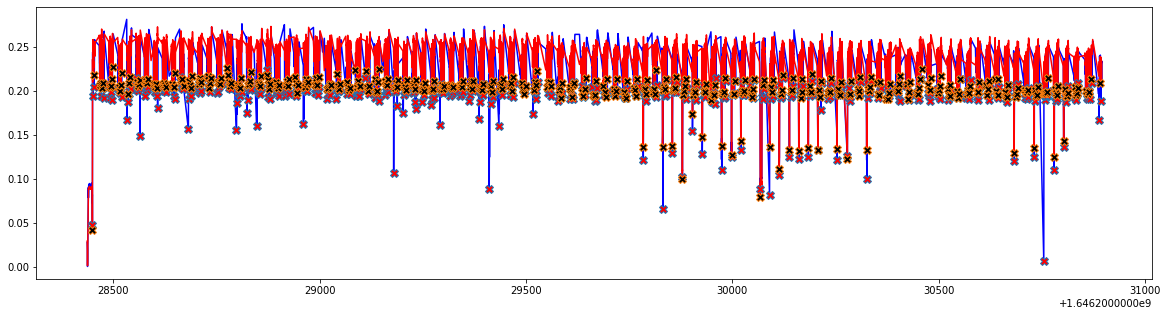

In [364]:
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.l,'b')
plt.plot(df_plus.t,df_plus.r,'r')
plt.plot(df_plus.t[plus_peaks_L], df_plus.l[plus_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[plus_peaks_R], df_plus.r[plus_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [365]:
print(sample_strikes_plus_L)
print(sample_strikes_plus_R)

[[], [1646228469.5236921, 1646228472.1418462, 1646228474.7575378, 1646228477.166064], [], [1646228489.4003618, 1646228490.551345, 1646228493.1092737, 1646228495.1658044, 1646228497.6667247], [], [1646228512.067521, 1646228514.9900784, 1646228516.3762717, 1646228517.3985567, 1646228520.0849657], [], [1646228533.477906, 1646228535.9734974, 1646228538.0496666, 1646228539.1740308, 1646228540.3048694, 1646228542.8564305], [], [1646228555.7300425, 1646228558.1260653, 1646228560.5251002, 1646228562.5835783, 1646228565.1956928], [], [1646228578.0283866, 1646228580.3725314, 1646228582.5237737, 1646228585.1566823], [], [1646228597.6217027, 1646228600.1830556, 1646228602.2406332, 1646228605.0704591, 1646228607.5226452], [], [1646228619.679147, 1646228622.1738813, 1646228624.7216785, 1646228626.8768945, 1646228628.569853], [], [1646228641.9699574, 1646228644.5156317, 1646228646.5002556, 1646228648.9370077], [], [1646228661.8276055, 1646228664.3690944, 1646228666.6053977, 1646228668.985082], [], [1

In [366]:
sample_strikes_plus_L = sample_strikes_plus_L[plus::2]
sample_strikes_plus_R = sample_strikes_plus_R[plus::2]

In [367]:
step_plus_R,_=step_time_array(sample_strikes_plus_R,sample_strikes_plus_L)
step_plus_L,_=step_time_array(sample_strikes_plus_L,sample_strikes_plus_R)

In [368]:
print(step_plus_R)
print(step_plus_L)

[array([1.2437737 , 1.26777935, 1.14581704]), array([2.2276175 , 3.54571366, 3.30674052, 4.17957306]), array([1.40053844, 1.30344725, 2.25062108, 4.0414381 ]), ['ooa'], array([1.19370651, 1.21284246, 0.95394945, 1.17964172]), array([1.04893804, 0.9512558 , 1.19521308]), array([1.20949268, 1.03647065, 1.69876623, 1.17549706]), array([1.36011767, 1.19746256, 0.88738155, 1.21669364]), array([1.1142571 , 0.95972276, 1.19871449, 1.51609159]), array([1.2693994 , 1.02530384, 1.02234316, 1.26984644]), array([1.28096056, 1.04006219, 1.20975971, 1.11273408]), array([1.2739799 , 1.04147625, 2.31588197, 3.6617074 ]), array([1.34801459, 0.9770062 , 0.97756171, 1.11560655]), array([1.37809944, 1.20009947, 1.21571279, 1.30512953]), array([1.13667941, 1.22942758, 1.21420264]), array([1.21421885, 1.05790114, 1.16959429, 1.22001767]), array([3.41917539, 3.58544016, 3.32093549, 3.48084593]), array([1.7875309 , 1.3009212 , 1.22483802, 1.30762696]), array([1.34655643, 1.06473184, 1.16433883, 1.23065853]), 

# minus direction

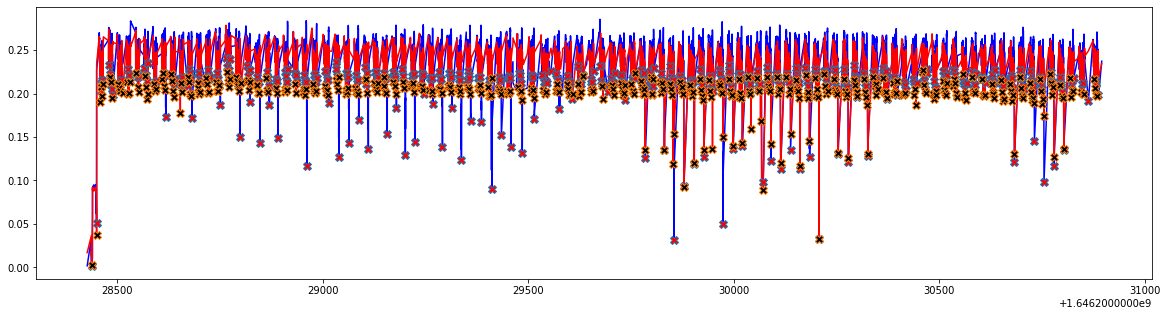

In [369]:
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.l,'b')
plt.plot(df_minus.t,df_minus.r,'r')
plt.plot(df_minus.t[minus_peaks_L], df_minus.l[minus_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[minus_peaks_R], df_minus.r[minus_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [370]:
print(sample_strikes_minus_L)
print(sample_strikes_minus_R)

[[1646228459.3132668, 1646228460.5759401, 1646228461.6503024, 1646228463.8892226], [], [1646228479.9435503, 1646228482.5872896, 1646228483.9383457, 1646228485.1223183, 1646228487.7210615, 1646228489.1563714], [], [1646228504.8494823, 1646228506.4780881, 1646228508.8255854], [], [1646228525.199545, 1646228527.7772446, 1646228530.2441194], [], [1646228548.3692365, 1646228550.5757987, 1646228553.027274], [1646228565.3555248], [1646228565.3555248, 1646228570.363443, 1646228572.553718], [1646228575.2351449], [1646228591.1124353, 1646228594.9907796], [], [1646228612.5047085, 1646228614.8966906, 1646228618.5616167], [], [1646228634.5303361, 1646228636.9374802], [1646228640.8405747], [1646228654.2895494, 1646228655.3835182, 1646228656.6869295, 1646228658.9803293], [], [1646228671.4521232, 1646228674.3243423, 1646228676.6145244, 1646228679.0012722, 1646228681.7533507], [], [1646228696.208193, 1646228698.601688, 1646228700.790472], [1646228715.0409203], [1646228715.0409203, 1646228720.1525128, 1

In [371]:
sample_strikes_minus_L = sample_strikes_minus_L[minus::2]
sample_strikes_minus_R = sample_strikes_minus_R[minus::2]

In [372]:
print(sample_strikes_minus_L)
print(sample_strikes_minus_R)

[[1646228459.3132668, 1646228460.5759401, 1646228461.6503024, 1646228463.8892226], [1646228479.9435503, 1646228482.5872896, 1646228483.9383457, 1646228485.1223183, 1646228487.7210615, 1646228489.1563714], [1646228504.8494823, 1646228506.4780881, 1646228508.8255854], [1646228525.199545, 1646228527.7772446, 1646228530.2441194], [1646228548.3692365, 1646228550.5757987, 1646228553.027274], [1646228565.3555248, 1646228570.363443, 1646228572.553718], [1646228591.1124353, 1646228594.9907796], [1646228612.5047085, 1646228614.8966906, 1646228618.5616167], [1646228634.5303361, 1646228636.9374802], [1646228654.2895494, 1646228655.3835182, 1646228656.6869295, 1646228658.9803293], [1646228671.4521232, 1646228674.3243423, 1646228676.6145244, 1646228679.0012722, 1646228681.7533507], [1646228696.208193, 1646228698.601688, 1646228700.790472], [1646228715.0409203, 1646228720.1525128, 1646228722.5410087, 1646228726.3590271], [1646228742.231815, 1646228744.657137, 1646228747.0274718, 1646228750.7714562], 

In [373]:
step_minus_R,_=step_time_array(sample_strikes_minus_R,sample_strikes_minus_L)
step_minus_L,_=step_time_array(sample_strikes_minus_L,sample_strikes_minus_R)

In [374]:
print(step_minus_R,step_minus_L)

[array([1.33928108, 2.14772058, 3.53931379]), ['ooa'], array([0.17883682, 1.06330442]), array([1.34923506, 1.02649045, 1.25697494]), array([1.10811543, 1.18022323]), [], array([ 0.07694697, -1.23949528]), array([-1.20620131, -1.19648147, -2.46211839]), ['ooa'], [], array([1.67284536, 1.18879294, 1.19457579, 1.33319664]), array([1.27006721, 1.10225916, 1.34675217]), array([ 1.59820247, -1.13026404, -1.26158214, -2.61729741]), array([1.20618963, 1.27082324, 1.19017911]), array([1.21585655, 1.54410243, 1.14588141, 1.3587842 ]), array([-1.15926766, -1.21495557, -1.85547018]), array([1.12754488, 1.23739791, 1.21530533]), array([-1.12432051, -1.36808419, -2.33855343]), [], array([1.2126894 , 1.14829016]), array([1.20472145, 1.11806059, 1.2921474 ]), array([1.15599775, 1.1225915 ]), array([1.23213267, 1.20963216, 1.2018683 ]), array([1.21212387, 1.36270285, 1.22229934]), array([1.89905071, 1.63616538, 1.43501425]), array([ 1.23037505,  1.10049272,  1.26981401, -0.07398343]), array([ 0.       

In [375]:
avg_step_plus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_L))
avg_step_minus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_L))
avg_step_plus_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_R))
avg_step_minus_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_R))

/tmp/ipykernel_4893/3252339705.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_plus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_L))
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_4893/3252339705.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_minus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_L))
/tmp/ipykernel_4893/3252339705.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform ele

In [376]:
T1=comb_dir_arrays(avg_step_plus_R,avg_step_minus_R,plus,minus)
T2=comb_dir_arrays(avg_step_plus_L,avg_step_minus_L,plus,minus)

In [377]:
T_s[0][0]=T1
T_s[0][1]=T2

# find heel strike and toe-off time-Right

# plus direction-Right

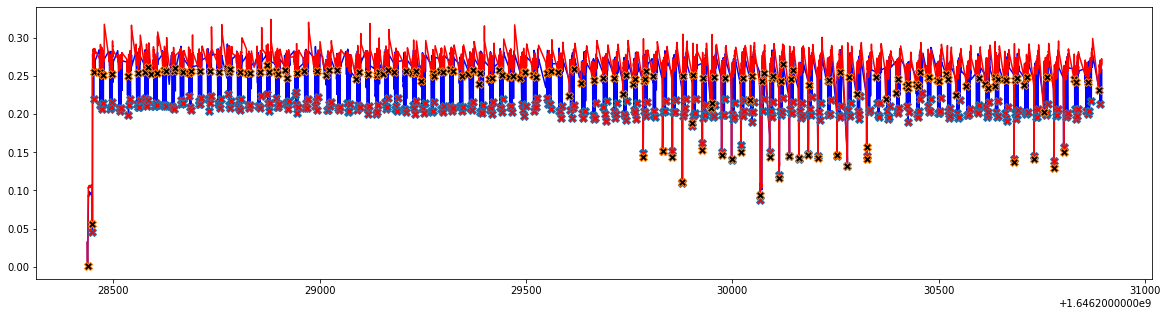

In [378]:
h_valley_plus_R, _ = find_peaks(-df_plus.h_R,prominence=0.05)
f_valley_plus_R, _ = find_peaks(-df_plus.f_R,prominence=0.025)
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.h_R,'b')
plt.plot(df_plus.t,df_plus.f_R,'r')
plt.plot(df_plus.t[h_valley_plus_R], df_plus.h_R[h_valley_plus_R],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[f_valley_plus_R], df_plus.f_R[f_valley_plus_R],"X",markerfacecolor='black',markersize=8)
plt.show()

# outlier remove-plus-Right

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


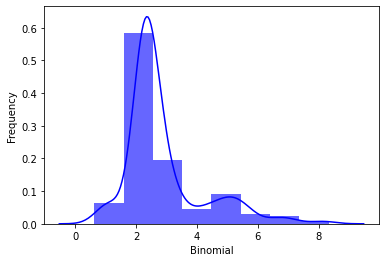

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


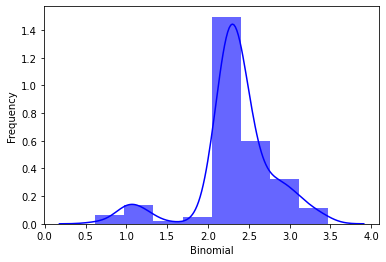

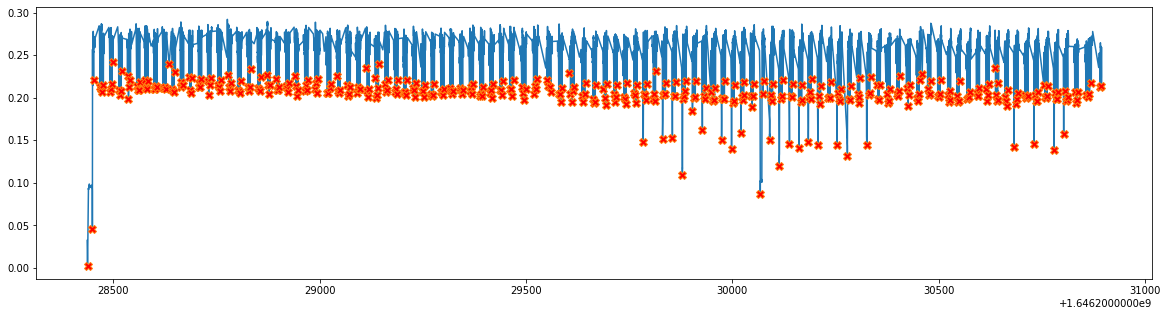

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


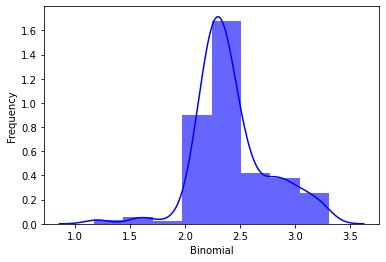

In [379]:
#toe off
dt_plus_to_r=time_diff(h_valley_plus_R)
distribution(dt_plus_to_r)
dt_plus_to_r_new=remove_time_gap(dt_plus_to_r)
distribution(dt_plus_to_r_new)
plus_peaks_to_r=remove_distinc(dt_plus_to_r,df_plus,Time_to_index_ratio,df_plus.h_R)
dt_plus_to_r=time_diff(plus_peaks_to_r)
dt_plus_to_r_cleaned=remove_time_gap(dt_plus_to_r)
distribution(dt_plus_to_r_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


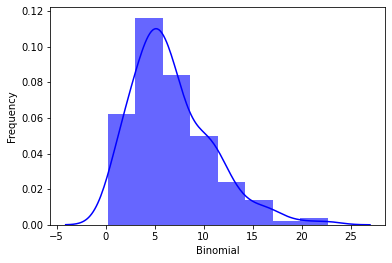

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


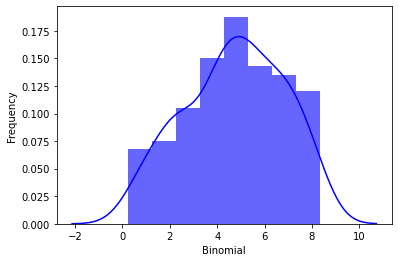

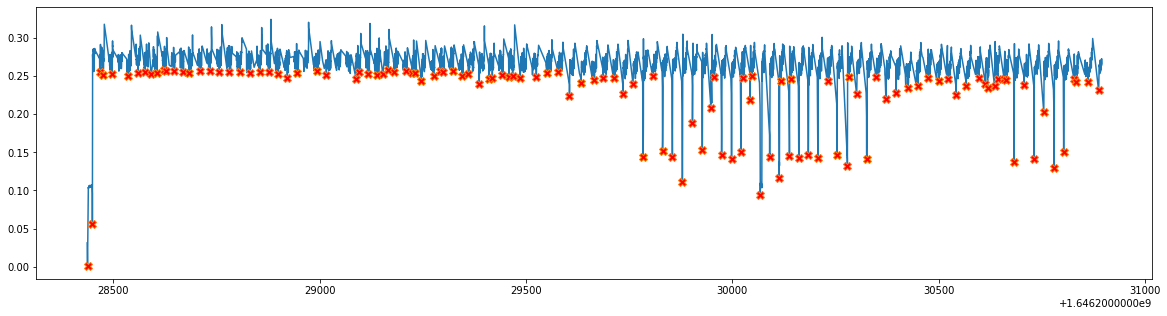

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


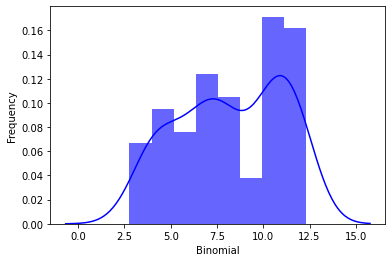

In [380]:
#heel strike
dt_plus_hs_r=time_diff(f_valley_plus_R)
distribution(dt_plus_hs_r)
dt_plus_hs_r_new=remove_time_gap(dt_plus_hs_r)
distribution(dt_plus_hs_r_new)
plus_peaks_hs_r=remove_distinc(dt_plus_hs_r,df_plus,Time_to_index_ratio,df_plus.f_R)
dt_plus_hs_r=time_diff(plus_peaks_hs_r)
dt_plus_hs_r_cleaned=remove_time_gap(dt_plus_hs_r)
distribution(dt_plus_hs_r_cleaned)

# minus direction-Right

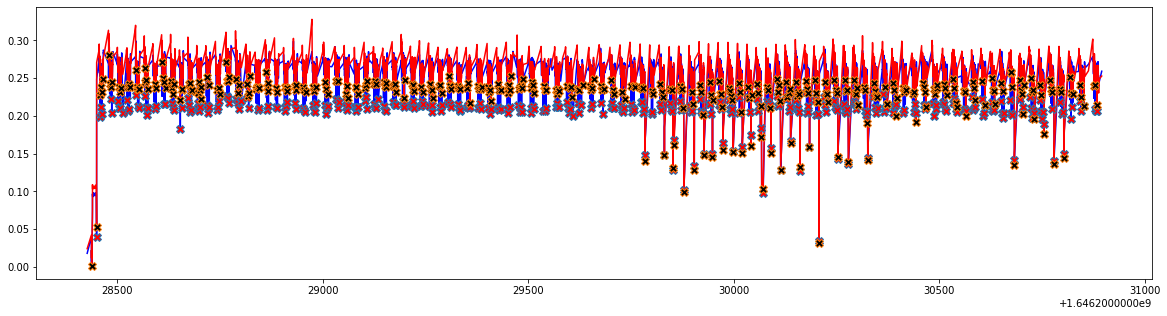

In [381]:
h_valley_minus_R, _ = find_peaks(-df_minus.h_R,prominence=0.05)
f_valley_minus_R, _ = find_peaks(-df_minus.f_R,prominence=0.025)
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.h_R,'b')
plt.plot(df_minus.t,df_minus.f_R,'r')
plt.plot(df_minus.t[h_valley_minus_R], df_minus.h_R[h_valley_minus_R],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[f_valley_minus_R], df_minus.f_R[f_valley_minus_R],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


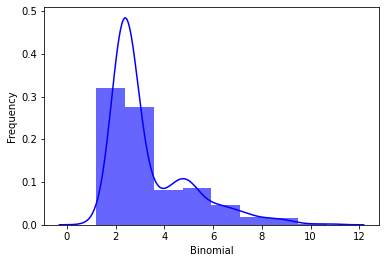

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


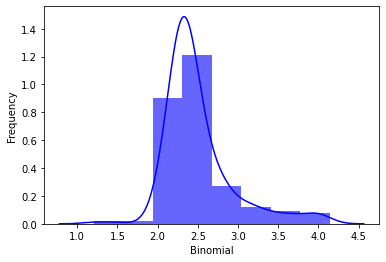

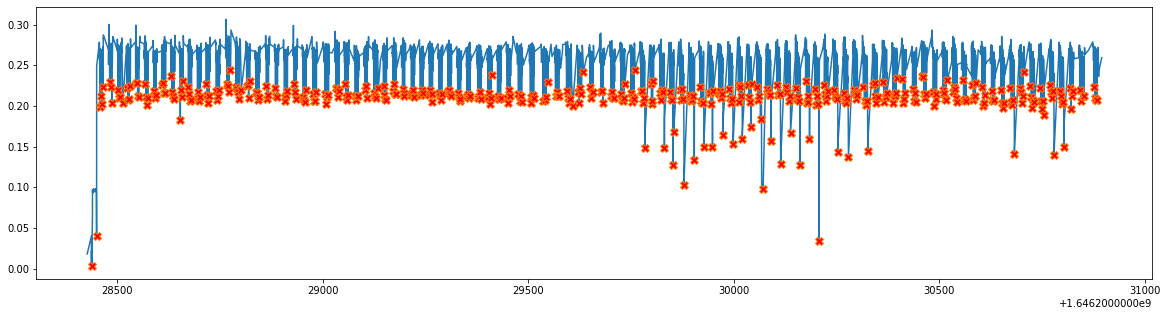

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


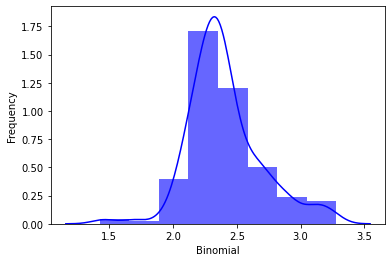

In [382]:
#toe off
dt_minus_to_r=time_diff(h_valley_minus_R)
distribution(dt_minus_to_r)
dt_minus_to_r_new=remove_time_gap(dt_minus_to_r)
distribution(dt_minus_to_r_new)
minus_peaks_to_r=remove_distinc(dt_minus_to_r,df_minus,Time_to_index_ratio,df_minus.h_R)
dt_minus_to_r=time_diff(minus_peaks_to_r)
dt_minus_to_r_cleaned=remove_time_gap(dt_minus_to_r)
distribution(dt_minus_to_r_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


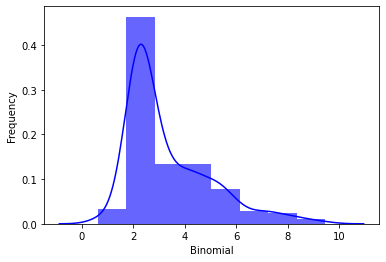

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


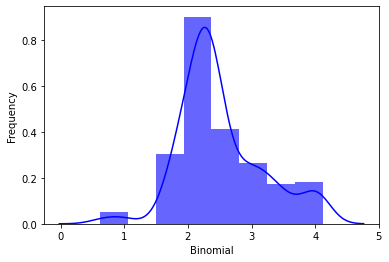

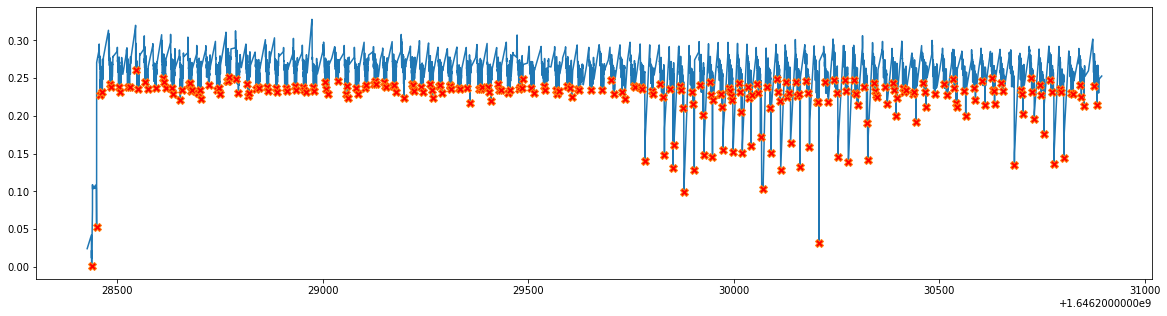

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


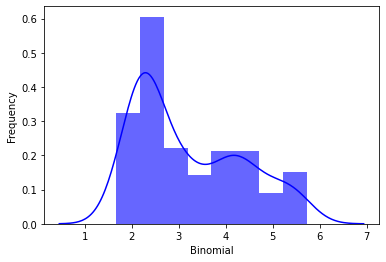

In [383]:
#heel strike
dt_minus_hs_r=time_diff(f_valley_minus_R)
distribution(dt_minus_hs_r)
dt_minus_hs_r_new=remove_time_gap(dt_minus_hs_r)
distribution(dt_minus_hs_r_new)
minus_peaks_hs_r=remove_distinc(dt_minus_hs_r,df_minus,Time_to_index_ratio,df_minus.f_R)
dt_minus_hs_r=time_diff(minus_peaks_hs_r)
dt_minus_hs_r_cleaned=remove_time_gap(dt_minus_hs_r)
distribution(dt_minus_hs_r_cleaned)

# sampling-Right

In [384]:
sample_strikes_plus_hs_R=sample(df_plus,plus_peaks_hs_r,time_return_points)
sample_strikes_minus_hs_R=sample(df_minus,minus_peaks_hs_r,time_return_points)
sample_strikes_plus_to_R=sample(df_plus,plus_peaks_to_r,time_return_points)
sample_strikes_minus_to_R=sample(df_minus,minus_peaks_to_r,time_return_points)


# find heel strike and toe-off time-left

# Plus direction-left

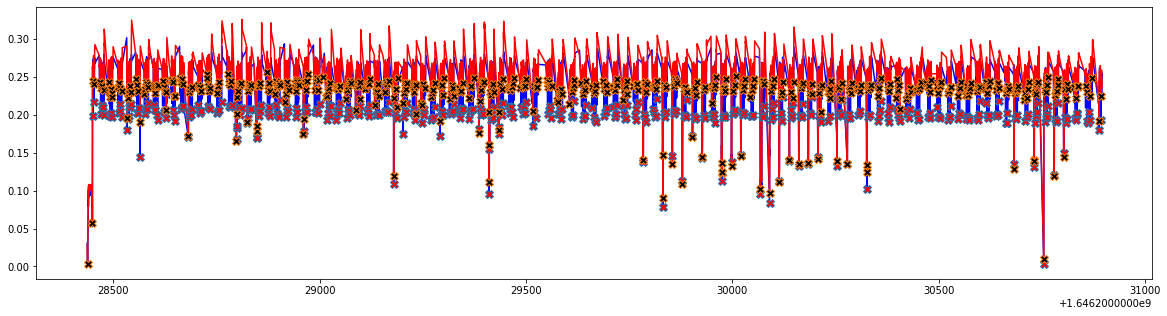

In [385]:
h_valley_plus_L, _ = find_peaks(-df_plus.h_L,prominence=0.05)
f_valley_plus_L, _ = find_peaks(-df_plus.f_L,prominence=0.02)
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.h_L,'b')
plt.plot(df_plus.t,df_plus.f_L,'r')
plt.plot(df_plus.t[h_valley_plus_L], df_plus.h_L[h_valley_plus_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[f_valley_plus_L], df_plus.f_L[f_valley_plus_L],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


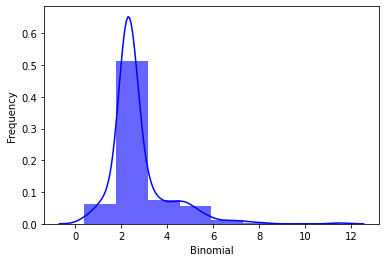

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


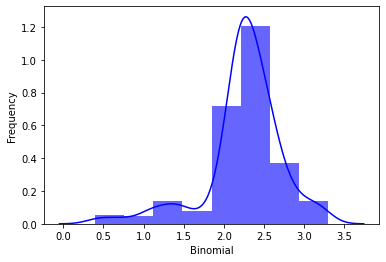

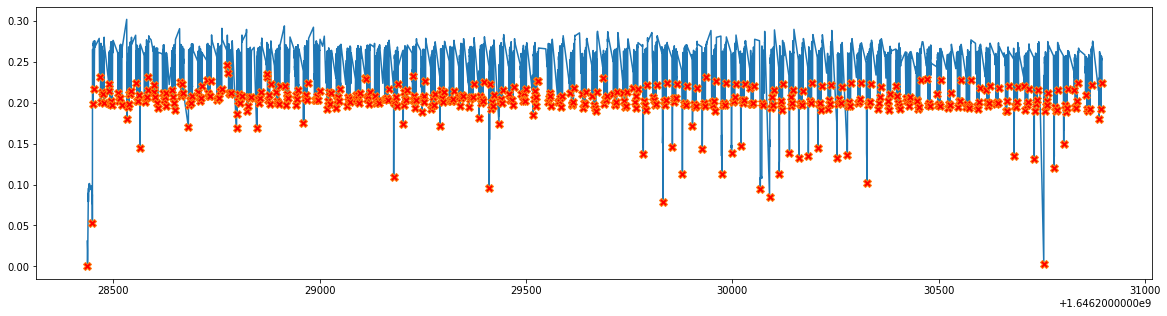

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


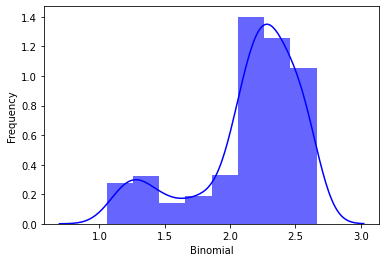

In [386]:
#toe off
dt_plus_to_l=time_diff(h_valley_plus_L)
distribution(dt_plus_to_l)
dt_plus_to_l_new=remove_time_gap(dt_plus_to_l)
distribution(dt_plus_to_l_new)
plus_peaks_to_l=remove_distinc(dt_plus_to_l,df_plus,Time_to_index_ratio,df_plus.h_L)
dt_plus_to_l=time_diff(plus_peaks_to_l)
dt_plus_to_l_cleaned=remove_time_gap(dt_plus_to_l)
distribution(dt_plus_to_l_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


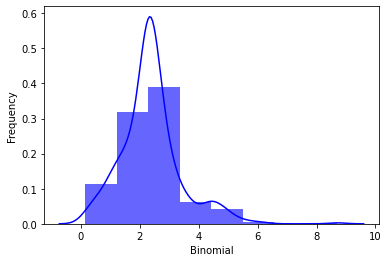

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


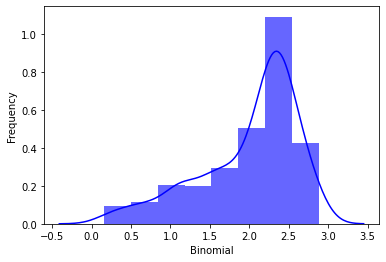

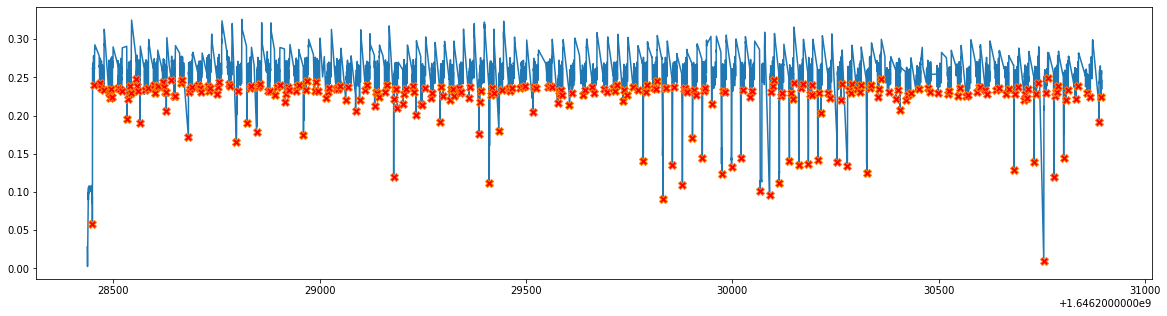

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


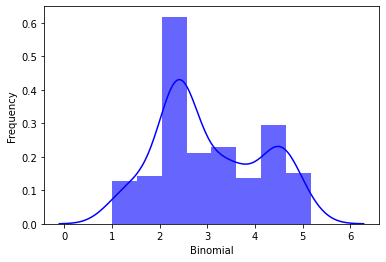

In [387]:
#heel strike
dt_plus_hs_l=time_diff(f_valley_plus_L)
distribution(dt_plus_hs_l)
dt_plus_hs_l_new=remove_time_gap(dt_plus_hs_l)
distribution(dt_plus_hs_l_new)
plus_peaks_hs_l=remove_distinc(dt_plus_hs_l,df_plus,Time_to_index_ratio,df_plus.f_L)
dt_plus_hs_l=time_diff(plus_peaks_hs_l)
dt_plus_hs_l_cleaned=remove_time_gap(dt_plus_hs_l)
distribution(dt_plus_hs_l_cleaned)

# minus-direction-left

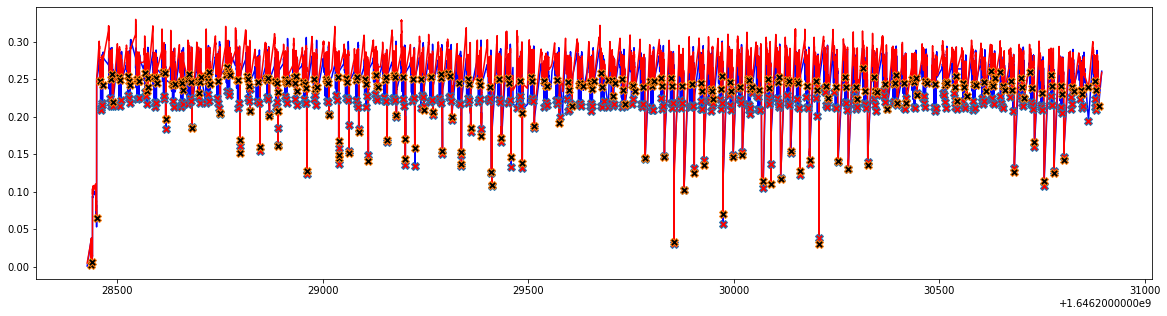

In [388]:
h_valley_minus_L, _ = find_peaks(-df_minus.h_L,prominence=0.05)
f_valley_minus_L, _ = find_peaks(-df_minus.f_L,prominence=0.03)
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.h_L,'b')
plt.plot(df_minus.t,df_minus.f_L,'r')
plt.plot(df_minus.t[h_valley_minus_L], df_minus.h_L[h_valley_minus_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[f_valley_minus_L], df_minus.f_L[f_valley_minus_L],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


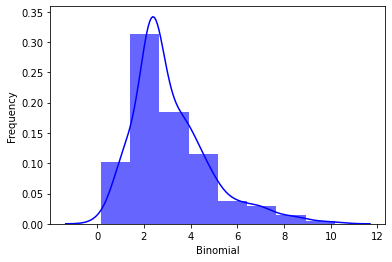

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


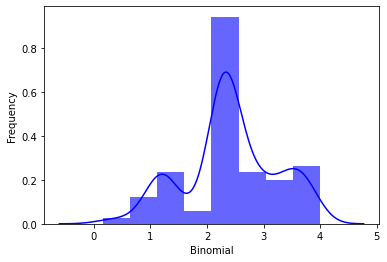

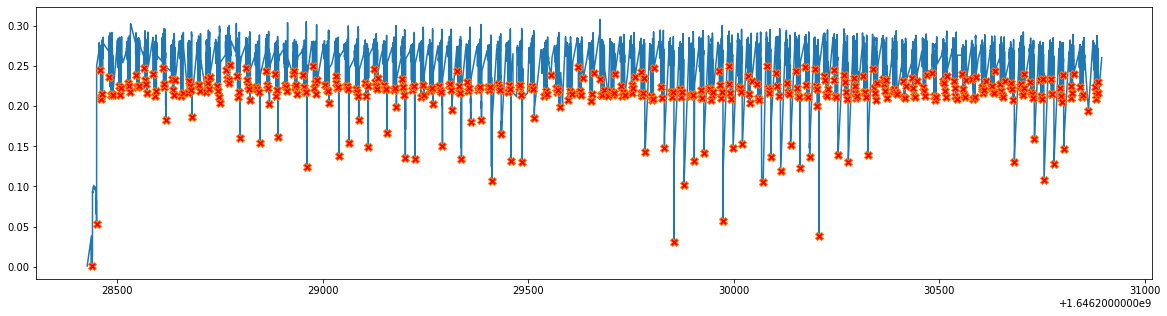

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


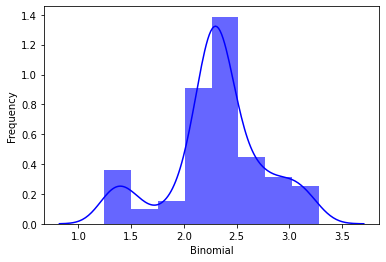

In [389]:
#toe off
dt_minus_to_l=time_diff(h_valley_minus_L)
distribution(dt_minus_to_l)
dt_minus_to_l_new=remove_time_gap(dt_minus_to_l)
distribution(dt_minus_to_l_new)
minus_peaks_to_l=remove_distinc(dt_minus_to_l,df_minus,Time_to_index_ratio,df_minus.h_L)
dt_minus_to_l=time_diff(minus_peaks_to_l)
dt_minus_to_l_cleaned=remove_time_gap(dt_minus_to_l)
distribution(dt_minus_to_l_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


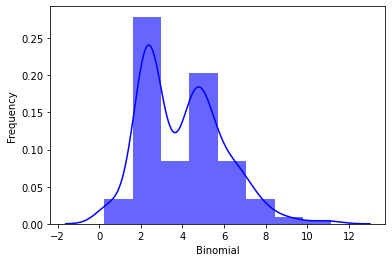

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


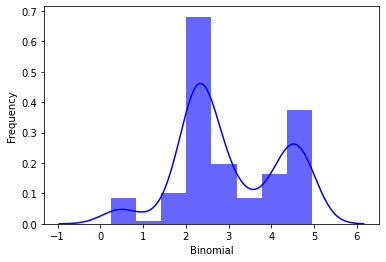

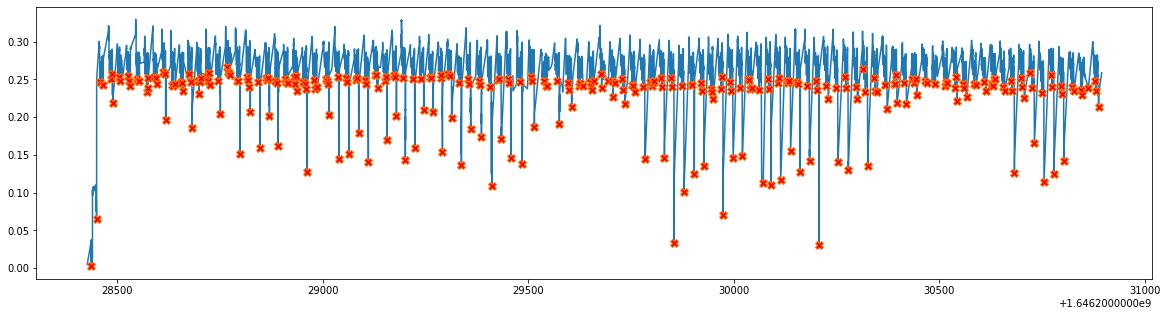

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


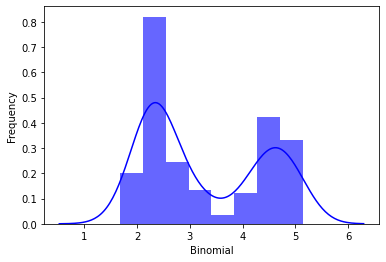

In [390]:
#heel strike
dt_minus_hs_l=time_diff(f_valley_minus_L)
distribution(dt_minus_hs_l)
dt_minus_hs_l_new=remove_time_gap(dt_minus_hs_l)
distribution(dt_minus_hs_l_new)
minus_peaks_hs_l=remove_distinc(dt_minus_hs_l,df_minus,Time_to_index_ratio,df_minus.f_L)
dt_minus_hs_l=time_diff(minus_peaks_hs_l)
dt_minus_hs_l_cleaned=remove_time_gap(dt_minus_hs_l)
distribution(dt_minus_hs_l_cleaned)

# sampling-left

In [391]:
sample_strikes_plus_hs_L=sample(df_plus,plus_peaks_hs_l,time_return_points)
sample_strikes_minus_hs_L=sample(df_minus,minus_peaks_hs_l,time_return_points)
sample_strikes_plus_to_L=sample(df_plus,plus_peaks_to_l,time_return_points)
sample_strikes_minus_to_L=sample(df_minus,minus_peaks_to_l,time_return_points)
sample_strikes_plus_hs_L=sample_strikes_plus_hs_L[plus::2]
sample_strikes_plus_to_L=sample_strikes_plus_to_L[plus::2]
sample_strikes_minus_hs_L=sample_strikes_minus_hs_L[minus::2]
sample_strikes_minus_to_L=sample_strikes_minus_to_L[minus::2]

In [392]:
def time_diff_array(first,second):
    second_array=[]
    first_array=[]
    try:
        if len(first)==len(second):
            if second[0]>first[0]:
                #print(1)
                Lstep=np.subtract(second,first) 
                second_array=Lstep
                Rstep=np.subtract(first[1:],second[:-1]) 
                first_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(first,second)
                first_array=Rstep
                Lstep=np.subtract(second[1:],first[:-1]) 
                second_array=Lstep

        elif (len(first)+1)==len(second):#when left strides are max by one
            if first[0]>second[0]:
                #print(3)
                Lstep=np.subtract(second[1:],first) 
                second_array=Lstep
                Rstep=np.subtract(first,second[:-1]) 
                first_array=Rstep

        elif len(first)==(len(second)+1):#when right strides are max by one
            if second[0]>first[0]:
                #print(4)
                Lstep=np.subtract(second,first[:-1]) 
                second_array=Lstep
                Rstep=np.subtract(first[1:],second) 
                first_array=Rstep

        else:
            #print(5)
            second_array.append('ooa')
            first_array.append('ooa')
            
    except:
            second_array.append('ooa')
            first_array.append('ooa')
        


    return first_array,second_array
                
    

In [393]:
time_diff_array([2,5,8],[3,7,10])

(array([2, 1]), array([1, 2, 2]))

# Calculate swing time

In [394]:
def swing_array(sample_strikes_hs,sample_strikes_to):
    swing_array=[]
    for i in range(len(sample_strikes_hs)):
        if not len(sample_strikes_hs[i])==0:
            #print(len(sample_strikes_plus_R[i]),len(sample_strikes_plus_L[i]))
            hs_to,_=time_diff_array(sample_strikes_hs[i],sample_strikes_to[i])
            swing_array.append(hs_to)
    return swing_array
        

In [395]:
swing_array_plus_R=swing_array(sample_strikes_plus_hs_R,sample_strikes_plus_to_R)
print(swing_array_plus_R)

[['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([0.]), ['ooa'], ['ooa'], array([0.]), ['ooa'], array([0.]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([0.]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([0.]), array([0.]), ['ooa'], ['ooa'], ['ooa']]


In [396]:
swing_array_plus_L=swing_array(sample_strikes_plus_hs_L,sample_strikes_plus_to_L)
print(swing_array_plus_L)

[['ooa'], [], [], [], [], ['ooa'], ['ooa'], array([0.08008122, 0.16172194, 0.24893856, 0.24182034, 0.        ]), [], ['ooa'], [], array([0.0771594 , 0.        , 0.        , 0.23770642]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], array([0.07975245, 2.35718322, 2.60036755]), ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], [], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([0.        , 0.        , 0.        , 0.08886027, 0.24462414]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([0.        , 0.        , 0.17007971, 0.26615   , 0.        ]), ['ooa'], [], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], [], ['ooa'], [], ['ooa'], ['ooa'], ['ooa'], array([0.47353482, 0.07761455, 2.6760211 , 2.75418258]), ['ooa'], ['ooa'], array([0.08110619, 0.08231068, 2.614182  ]), ['ooa'

In [397]:
swing_array_minus_R=swing_array(sample_strikes_minus_hs_R,sample_strikes_minus_to_R)
swing_array_minus_L=swing_array(sample_strikes_minus_hs_L,sample_strikes_minus_to_L)

In [398]:
def avrg(x):
    array=[]
    for i in x:
        if i==['ooa']:
            array.append(['ooa'])
        elif len(i)==0:
            array.append([])
        else:
            s=0
            for j in i:
                s+=j
            m=s/len(i)
            array.append(m)    
    return array

In [399]:
avg_swing_plus_R=avrg(swing_array_plus_R)
avg_swing_plus_L=avrg(swing_array_plus_L)
avg_swing_minus_R=avrg(swing_array_minus_R)
avg_swing_minus_L=avrg(swing_array_minus_L)

/tmp/ipykernel_4893/2757863319.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i==['ooa']:


In [400]:
T7=comb_dir_arrays(avg_swing_plus_R,avg_swing_minus_R,plus,minus)
T8=comb_dir_arrays(avg_swing_plus_L,avg_swing_minus_L,plus,minus)

In [401]:
T_s[3][0]=T7
T_s[3][1]=T8

In [402]:

#output = open('side.pkl', 'wb')
#pickle.dump(T_s, output)
#output.close()

# calculate double support time

In [403]:
def double_support_time(to_R,hs_R,to_L,hs_L):
    array=[]
    if to_R==hs_L==hs_R==hs_L:
        if to_R[0]>hs_L[i][0]:
            dst1=np.subtract(to_R,hs_L)
            dst2=np.subtract(to_L[1:],hs_R)
            dst=np.add(dst1,dst2)
            array.append(dst)
        elif to_L[i][0]>hs_R[i][0]:
            dst1=np.subtract(to_R[1:],hs_L)
            dst2=np.subtract(to_L,hs_R)
            dst=np.add(dst1,dst2)
            array.append(dst)
        else:
            dst_array.append("ooa")
        return array
    else:
        return "ooa"   

In [404]:
def double_support_time_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L):
    dst_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not len(sample_strikes_to_R[i])==0:
            array=double_support_time(sample_strikes_to_R[i],sample_strikes_hs_R[i],sample_strikes_to_L[i],sample_strikes_hs_L[i])
            dst_array.append(array)
    return dst_array
        

In [405]:
double_support_time(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L)

'ooa'

# calculate stance time ratio

In [406]:

T_plus=np.add(avg_stride_plus_L,avg_stride_plus_R)/2
T_minus=np.add(avg_stride_minus_L,avg_stride_minus_R)/2

In [407]:
def stance_time_ratio_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L,T):
    str_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not (len(sample_strikes_to_R[i])==0 or len(sample_strikes_to_L[i])==0 or len(sample_strikes_hs_R[i])==0 or len(sample_strikes_hs_L[i])==0):
            left,_=time_diff_array(sample_strikes_to_L[i][1:],sample_strikes_hs_L[i][:-1])
            right,_=time_diff_array(sample_strikes_to_R[i][1:],sample_strikes_hs_R[i][:-1])
            if left==['ooa'] or right==['ooa']:
                str_array.append(['ooa'])
            else:
                if len(left)>len(right):
                    right=np.concatenate((right, [np.mean(right)]*abs(len(left)-len(right))), axis=0)
                elif len(left)<len(right):
                    left=np.concatenate((left, [np.mean(left)]*abs(len(left)-len(right))), axis=0)
                array=np.add(left,right)
                print(array)
                array=array/T[i]
                str_array.append(array)

    return str_array

In [408]:
STR_plus=stance_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_plus)
STR_minus=stance_time_ratio_array(sample_strikes_minus_to_R,sample_strikes_minus_hs_R,sample_strikes_minus_to_L,sample_strikes_minus_hs_L,T_minus)
print(STR_plus)
print(STR_minus)

[]
[]
[nan nan]
[3.19651389 3.29655838 3.30180061]
[]
[]
[]
[]
[nan nan]
[]
[nan]
[]
[nan nan nan]
[nan nan]
[4.16252089 4.09839511 6.37763405]
[nan nan nan]
[['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa']]
[['ooa'], array([], dtype=float64), array([], dtype=float64), ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([nan, nan]), ['ooa'], ['ooa'], array([1.2841341 , 1.32432492, 1.32643088]), array([], dtype=float64), ['ooa'], array([], dtype=float64), array([], dtype=float64), ['ooa'], ['ooa'], array([], dtype=float64), array([nan, nan]), ['ooa'], ['ooa'], array([], dtype=float64), ['ooa'], ['ooa'], array([nan]), ['ooa'], array([], dt

/tmp/ipykernel_4893/3520770124.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if left==['ooa'] or right==['ooa']:
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# calculate swing time ratio

In [409]:
def swing_time_ratio_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L,T):
    swr_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not len(sample_strikes_to_R[i])==0:
            left,_=time_diff_array(sample_strikes_hs_L[i],sample_strikes_to_L[i])
            right,_=time_diff_array(sample_strikes_hs_R[i],sample_strikes_to_R[i])
            if left==['ooa'] or right==['ooa']:
                swr_array.append(['ooa'])
            else:
                if len(left)>len(right):
                    right=np.concatenate((right, [np.mean(right)]*abs(len(left)-len(right))), axis=0)
                elif len(left)<len(right):
                    left=np.concatenate((left, [np.mean(left)]*abs(len(left)-len(right))), axis=0)
                array=np.add(left,right)
                array=array/T[i]
                swr_array.append(array)
            
    return swr_array

In [410]:
swing_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_plus)
swing_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_minus)

/tmp/ipykernel_4893/769455618.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if left==['ooa'] or right==['ooa']:


[['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa']]

# .....................................................................................

In [411]:

output = open('para_values/isurika.pkl', 'wb')
pickle.dump(T_s, output)
output.close()

In [606]:
def time_diff(tn1,tn):
    return (tn1-tn)

def stride_frequency(tn1,tn):
    return 1/(tn1-tn)

def swing_time(tn_hs,tn_to):
    return tn_hs-tn_to

def doubleSupport_time(tn_hs_L,tn_to_L,tn_hs_R,tn1_to_R):
    output=(tn_to_L-tn_hs_R)+(tn1_to_R-tn_hs_L)
    return output

def foot_flat_time(tn_ff,tn_hs):
    return tn_ff-tn_hs

def stance_time_ratio(tn_hs_L,tn1_to_L,tn_hs_R,tn1_to_R,T):
    output=((tn1_to_L-tn_hs_L)+(tn1_to_R-tn_hs_R))/T
    return output

def swing_time_ratio(tn_hs_L,tn_to_L,tn_hs_R,tn_to_R,T):
    output=((tn_hs_L-tn_to_L)+(tn_hs_R-tn_to_R))/T
    return output

In [401]:
mp_holistic.POSE_CONNECTIONS

NameError: name 'mp_holistic' is not defined

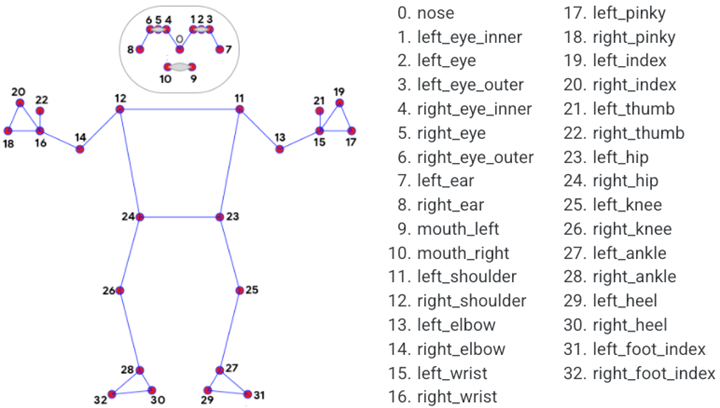